##  The Data Analysis of titanic

In [192]:
# import the package
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 加载CSV数据

In [193]:
def get_data_from_file(file):
    """
    Get data set from the csv file and return a list variable contains 
    all data set.
    @param file: The path of file and filename you want get.You can use
    absolute path and relative path.
    @return: A list variable
    """
    with open(file, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return pd.Series(list(reader))

In [194]:
titanic_data_list = get_data_from_file('titanic-data.csv')
print titanic_data_list[0]

{u'Fare': u'7.25', u'Name': u'Braund, Mr. Owen Harris', u'Embarked': u'S', u'Age': u'22', u'Parch': u'0', u'Pclass': u'3', u'Sex': u'male', u'Survived': u'0', u'SibSp': u'1', u'PassengerId': u'1', u'Ticket': u'A/5 21171', u'Cabin': u''}


## 提出问题
- 乘客的经济地位与是否生还之间的关系？
- 乘客的出发港与是否生还之间的关系？
- 男性与女性之间的生还比例？
- 有哪些因素会让船上的人生还率更高？

## 修正数据类型

In [195]:
def parse_maybe_int(number):
    """
    Parse string to int.
    @param number: the data to pase.
    @return: the result of parsing.
    """
    if number == '':
        return None
    else:
        return int(number)
    
def parse_maybe_float(number):
    """
    Parse string to float.
    @param number: the data to pase.
    @return: the result of parsing.
    """
    if number == '':
        return None
    else:
        return float(number)
    
def parse_embarkation(embarkation):
    """
    Convert the abbreviation to the full name of embarkation.
    @param number: the abbreviation of embarkation.
    @return: the full name of embarkation.
    """
    if embarkation == 'C':
        return 'Cherbourg'
    elif embarkation == 'Q':
        return 'Queenstown'
    elif embarkation == 'S':
        return 'Southampton'
    else:
        return None

# The dictionary for the Ticket Class
pclass = {}
pclass['1'] = 'Upper'
pclass['2'] = 'Middle'
pclass['3'] = 'Lower'

# The dictionary for the sex
sex = {}
sex['1'] = 'male'
sex['2'] = 'female'

# The dictionary for the survival
survival = {}
survival['0'] = 'No'
survival['1'] = 'Yes'

In [196]:
# Covert the data type
for titanic_data in titanic_data_list:
    titanic_data['PassengerId'] = parse_maybe_int(titanic_data['PassengerId'])
    titanic_data['Survived'] = parse_maybe_int(titanic_data['Survived'])
    titanic_data['Pclass'] = parse_maybe_int(titanic_data['Pclass'])
    titanic_data['Age'] = parse_maybe_float(titanic_data['Age'])
    titanic_data['SibSp'] = parse_maybe_int(titanic_data['SibSp'])
    titanic_data['Parch'] = parse_maybe_int(titanic_data['Parch'])
    titanic_data['Embarked'] = parse_embarkation(titanic_data['Embarked'])

print titanic_data_list[0]

{u'Fare': u'7.25', u'Name': u'Braund, Mr. Owen Harris', u'Embarked': 'Southampton', u'Age': 22.0, u'Parch': 0, u'Pclass': 3, u'Sex': u'male', u'Survived': 0, u'SibSp': 1, u'PassengerId': 1, u'Ticket': u'A/5 21171', u'Cabin': u''}


## 探索数据

In [197]:
print "The number of passager:"
print len(titanic_data_list)
print "The number of passger who doesn't have age:"
print sum(1 for a in titanic_data_list if a['Age'] == None)

The number of passager:
891
The number of passger who doesn't have age:
177


In [198]:
def survived_percentage(dif_survived_count, dif_count):
    """
    Calculate the survived percentage of different type
    """
    return pd.Series([1.0*x/y for x, y in zip(dif_survived_count, dif_count)])

def draw(title, xData, xLabel):
    xticks = [i for i in range(len(xData))]
    
    plt.title(title)
    plt.ylabel('Pertange')
    plt.xticks(xticks,xLabel)
    plt.bar(left = xticks,height = xData, width=0.2 )
    plt.show()

## 部分乘客缺失年龄记录

In [199]:
titanic_age_list = []
for titanic_data in titanic_data_list:
    if titanic_data['Age'] != None:
        titanic_age_list.append(titanic_data['Age'])

## 不同经济地位的乘客生还率

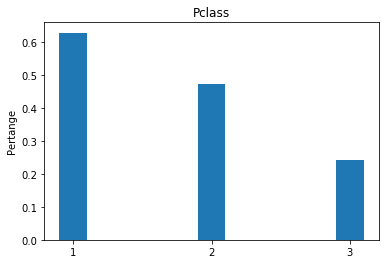

In [200]:
dif_pclass_survived = [sum(a['Survived'] for a in titanic_data_list if a['Pclass'] == 1),
                       sum(a['Survived'] for a in titanic_data_list if a['Pclass'] == 2),
                       sum(a['Survived'] for a in titanic_data_list if a['Pclass'] == 3)]

dif_pclass_count = [sum(1 for a in titanic_data_list if a['Pclass'] == 1),
                    sum(1 for a in titanic_data_list if a['Pclass'] == 2),
                    sum(1 for a in titanic_data_list if a['Pclass'] == 3)]

pclass_survived_percentage = survived_percentage(dif_pclass_survived, dif_pclass_count)
draw('Pclass', pclass_survived_percentage, [1, 2, 3])

## 不同出发港的乘客生还率

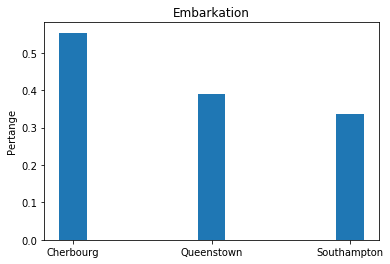

In [201]:
dif_embarkation_survived = [sum(a['Survived'] for a in titanic_data_list if a['Embarked'] == 'Cherbourg'),
                       sum(a['Survived'] for a in titanic_data_list if a['Embarked'] == 'Queenstown'),
                       sum(a['Survived'] for a in titanic_data_list if a['Embarked'] == 'Southampton')]

dif_embarkation_count = [sum(1 for a in titanic_data_list if a['Embarked'] == 'Cherbourg'),
                    sum(1 for a in titanic_data_list if a['Embarked'] == 'Queenstown'),
                    sum(1 for a in titanic_data_list if a['Embarked'] == 'Southampton')]

pclass_survived_percentage = survived_percentage(dif_embarkation_survived, dif_embarkation_count)

draw("Embarkation", pclass_survived_percentage, ['Cherbourg', 'Queenstown', 'Southampton'])

## 男性与女性的生还率

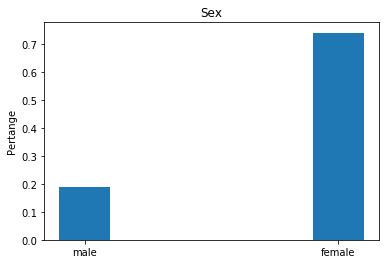

In [202]:
dif_sex_survived = [sum(a['Survived'] for a in titanic_data_list if a['Sex'] == 'male'),
                       sum(a['Survived'] for a in titanic_data_list if a['Sex'] == 'female')]

dif_sex_count = [sum(1 for a in titanic_data_list if a['Sex'] == 'male'),
                    sum(1 for a in titanic_data_list if a['Sex'] == 'female')]

sex_survived_percentage = survived_percentage(dif_sex_survived, dif_sex_count)

draw("Sex", sex_survived_percentage, ['male', 'female'])

## 分享发现
- 乘客的经济地位越高，生还的可能性越大
- 在Cherbourg上船的乘客生还率最高，接下来以此是Queestown, Southampton.
- 男性的生还率非常的低；相反女性的生还率就比较高.
- 经济地位高、在Cherbourg海港上船、女性这些因素都会使乘客的生还率更高